#### Name : Praduvi 
#### Student ID :
#### Project  ID :
#### 

In [ ]:
"""
!pip3 install opendatasets
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
"""

In [17]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
od.download("https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset")

Skipping, found downloaded files in "./diabetes-health-indicators-dataset" (use force=True to force download)


In [19]:
file1 = "diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv"
file2 = "diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv"
file3 = "diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

In [20]:
### Loading the files

In [21]:
# Loading the First File : which has three diabetes class (3 classes. 0 : diabetes, 1 : prediabetes, 2 : diabetes)
df1 = pd.read_csv(file1)
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### **Cleaning the Panda Dataframe**

In [22]:
#checking if dataframe has any missing values in any column
for column in df1:
    print(f'{column} : {df1[column].isna().sum()}')

Diabetes_binary : 0
HighBP : 0
HighChol : 0
CholCheck : 0
BMI : 0
Smoker : 0
Stroke : 0
HeartDiseaseorAttack : 0
PhysActivity : 0
Fruits : 0
Veggies : 0
HvyAlcoholConsump : 0
AnyHealthcare : 0
NoDocbcCost : 0
GenHlth : 0
MentHlth : 0
PhysHlth : 0
DiffWalk : 0
Sex : 0
Age : 0
Education : 0
Income : 0


In [23]:
# If any missing value found, we will drop that row as dataset as 253680 samples in it
df1.dropna(inplace=True)

In [24]:
# Renaming the Diabetes column to make all dataframes consistant
df1.rename(columns = {'Diabetes_binary':'Diabetes'}, inplace = True)
df1.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### **Studying individual factor which may have influance the Diabetes**

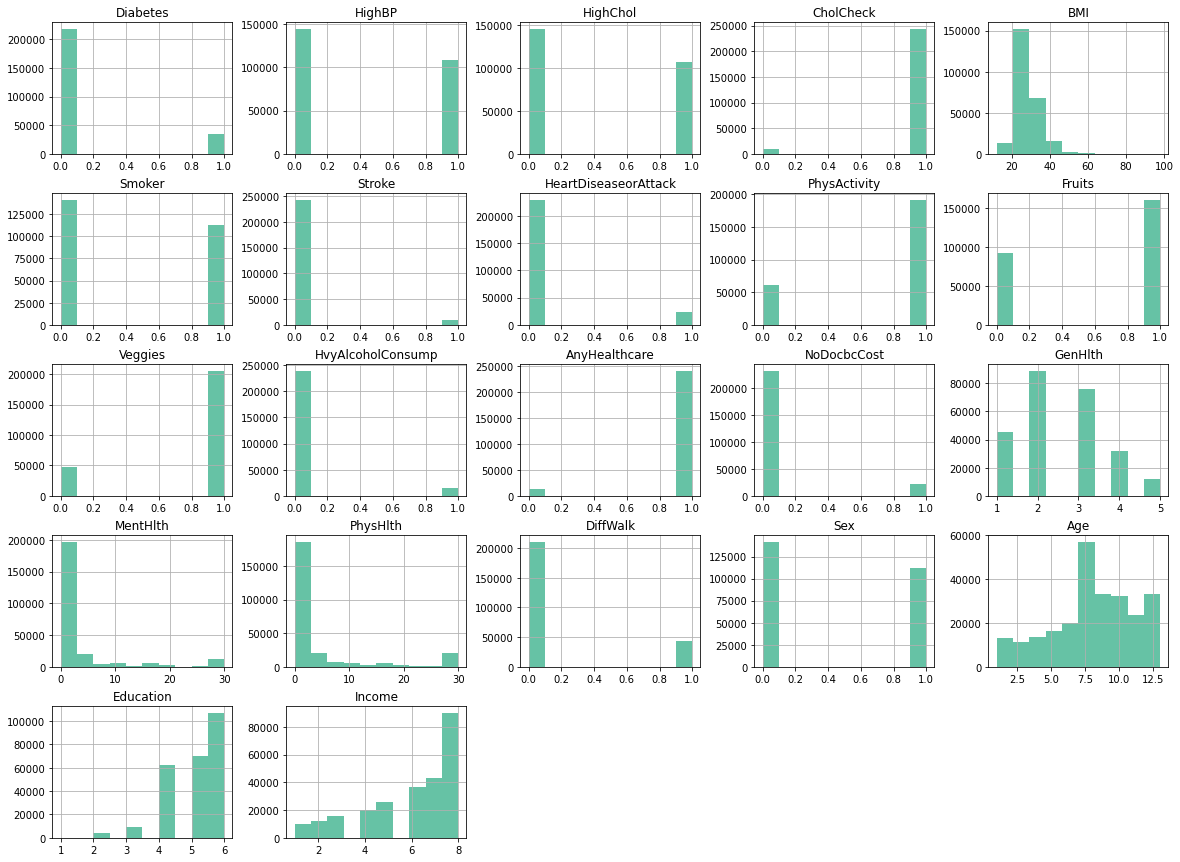

In [25]:
sns.set_palette('Set2')
df1.hist(figsize=(20,15));
plt.show()

In [26]:
### **Plotting all Binary Columns**

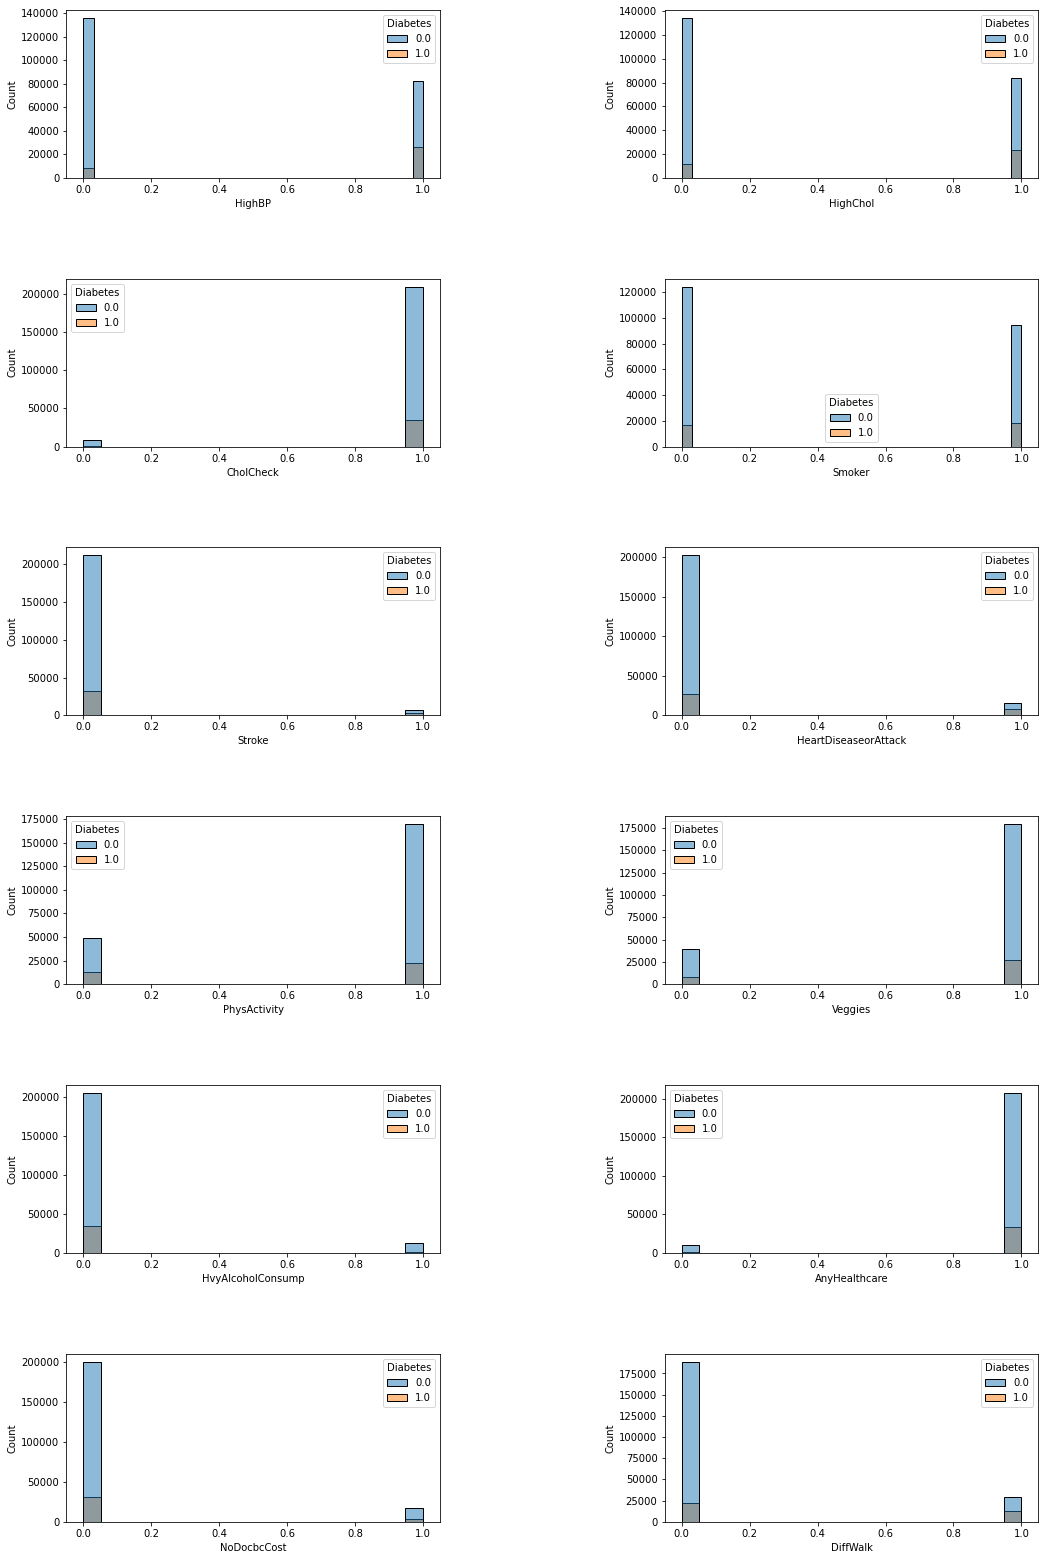

In [27]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

plt.figure(figsize = (15,15))
for i,col in enumerate(cols):
    plt.subplot(6,2,i+1)
    sns.histplot(data=df1,x = col,palette='tab10',hue='Diabetes')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=1.5, wspace=0.6, hspace=0.6)
plt.show()

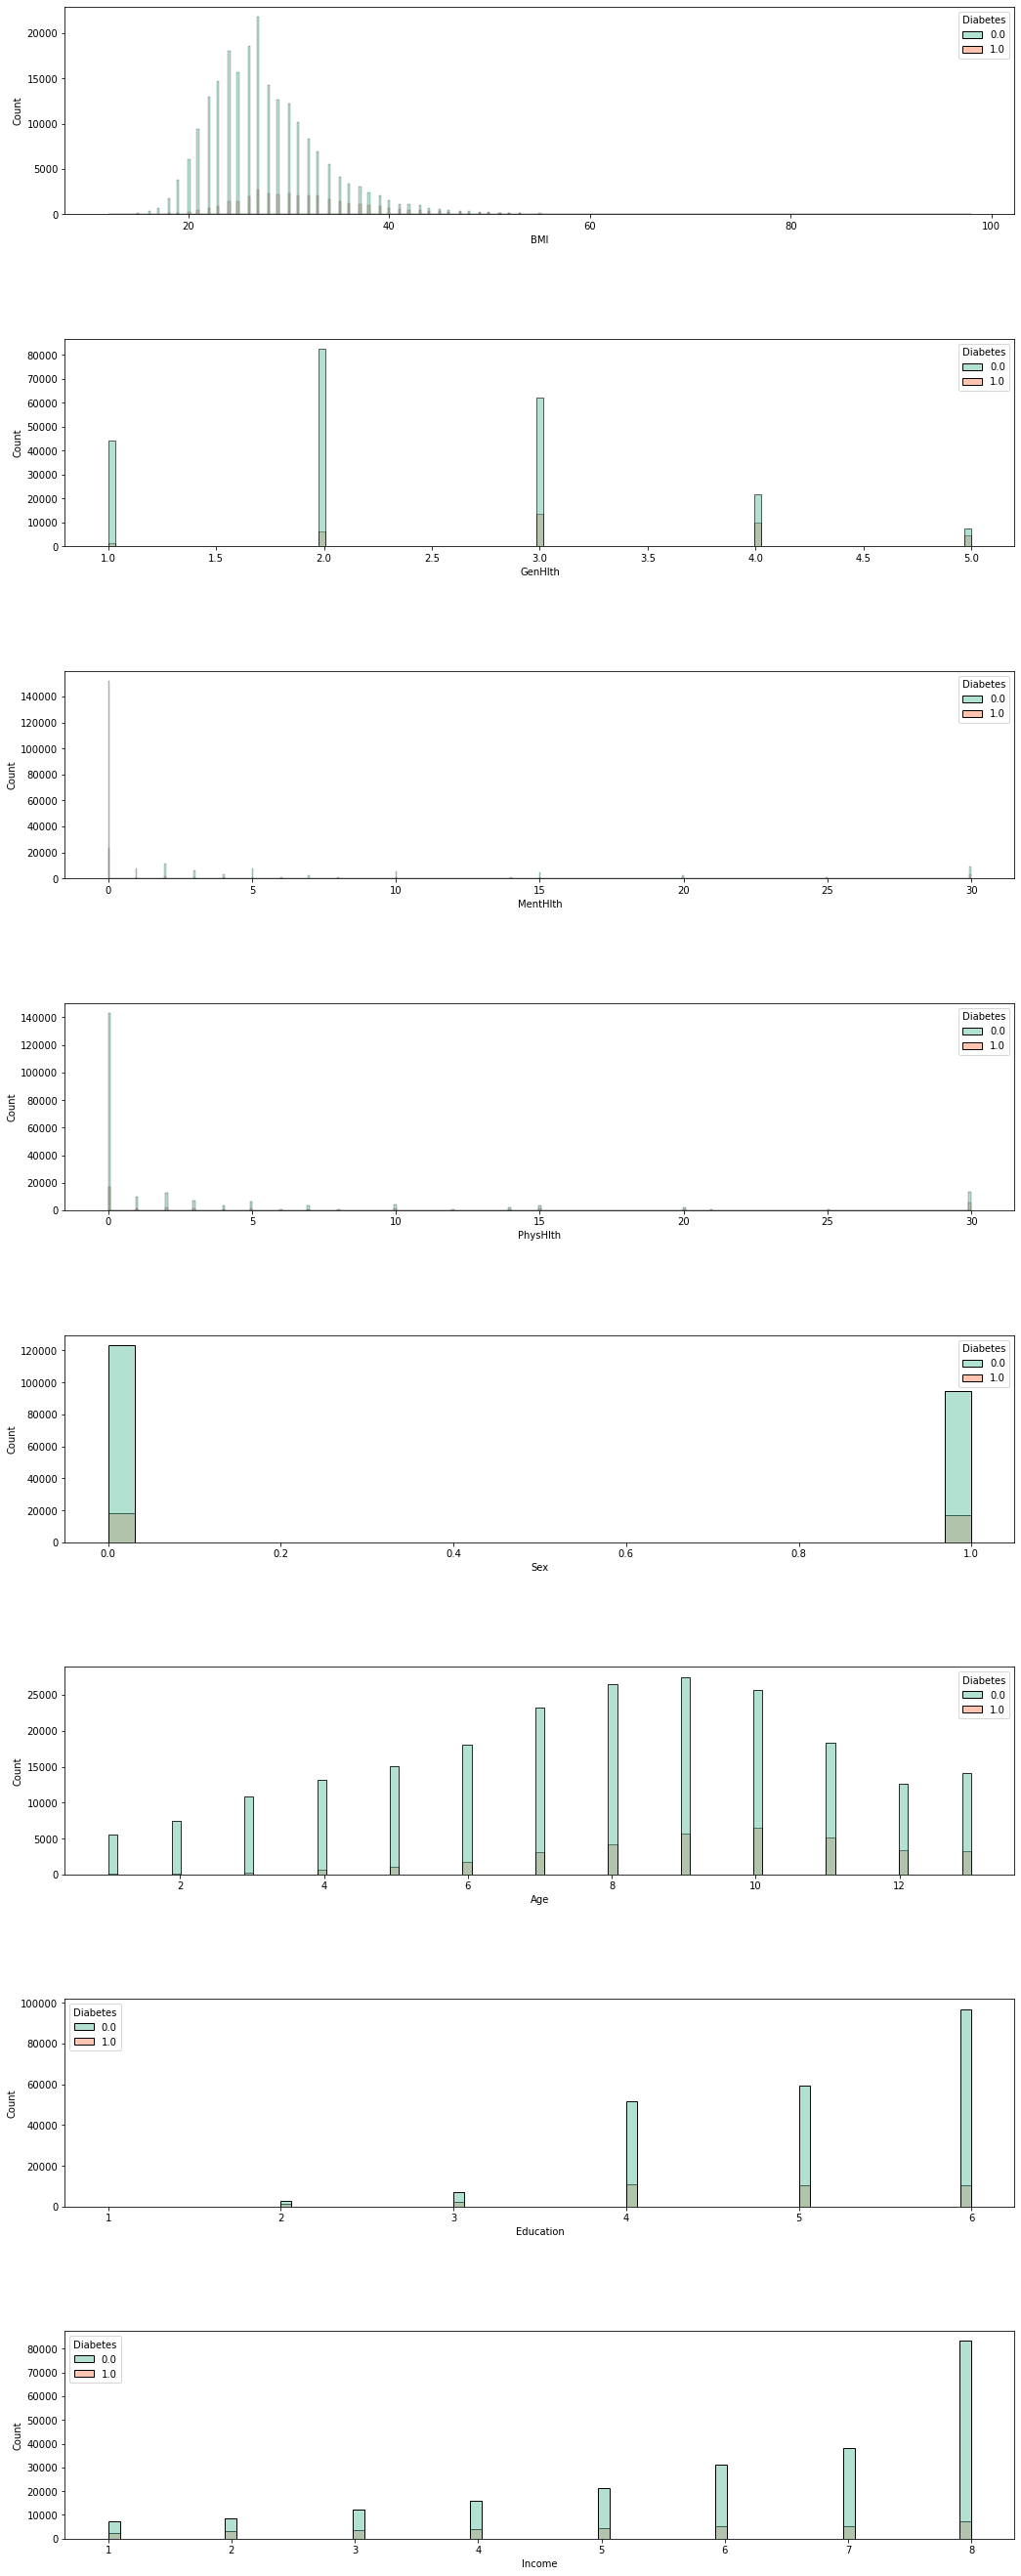

In [28]:
cols = ['BMI', 'GenHlth','MentHlth', 'PhysHlth',  'Sex', 'Age', 'Education','Income']
cmap=[ "Cyan", "blue", "Red", "Green", "Purple","Black","Magenta","Orange","Olive", "Brown"]
plt.figure(figsize = (15,15))
for i,col in enumerate(cols):
    plt.subplot(8,1,i+1)
    sns.histplot(data=df1,x = col,color=cmap,hue='Diabetes')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=2.5, wspace=0.6, hspace=0.6)
plt.show()

In [29]:
df1.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Checking the outliers for non-binary columns 

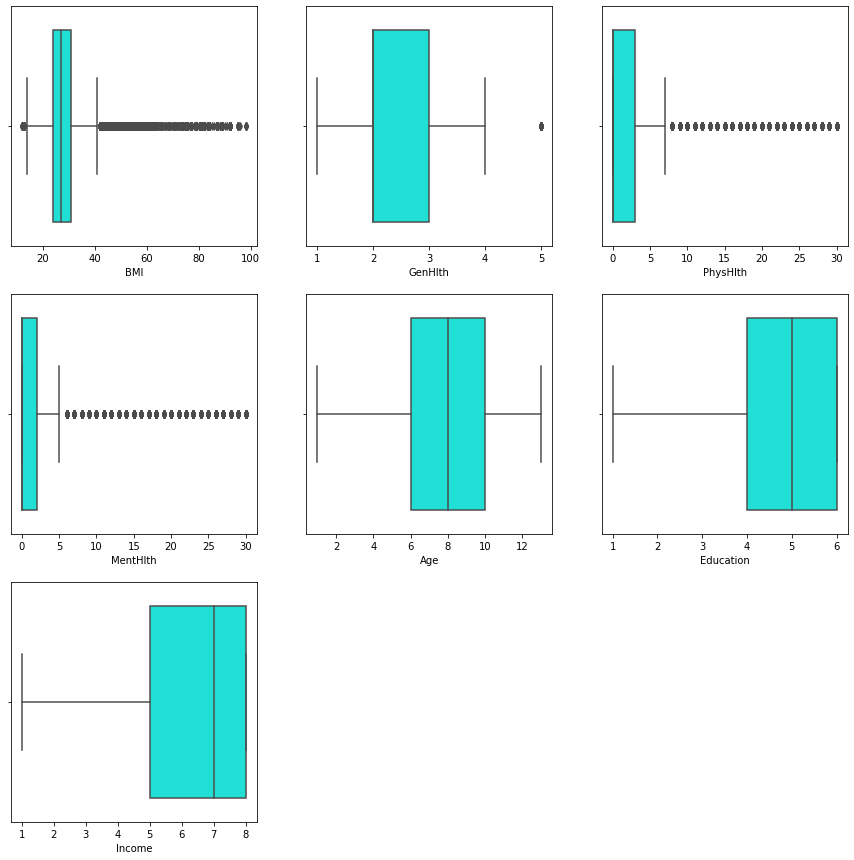

In [30]:
plt.figure(figsize = (15,15))
for i,col in enumerate([ 'BMI', 'GenHlth','PhysHlth','MentHlth', 'Age', 'Education','Income']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = df1 ,palette='hsv_r')
plt.show()

# **Checking which dataset is more balanced as Non-diabetes Vs Diabetes**

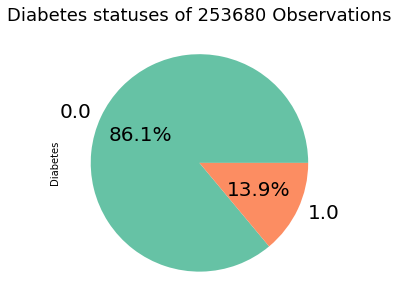

In [31]:
axes = df1.Diabetes.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, figsize=(5, 5))
axes.set_title("Diabetes statuses of {} Observations".format(df1.shape[0]), fontsize=18)
plt.show()

## Check The Correlation between each column of the dataset

Text(0.5, 1.0, 'correlation of feature')

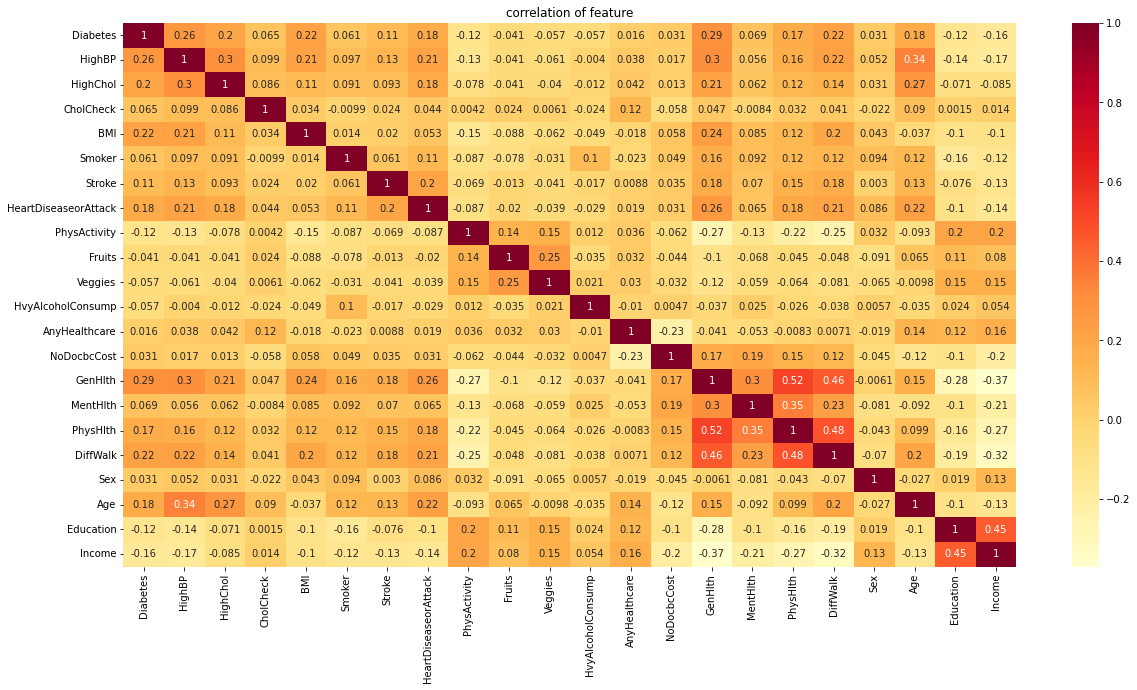

In [32]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

## Mostly prominent factor which is highly Correlated Factors with Diabetes 

In [34]:
v = df1.corr()
names =  df1.columns
for index in range(1,len(v.Diabetes)):
    if v.Diabetes[names[index]] >  0.2:
        print(f'{names[index]:15} : {v.Diabetes[names[index]]:0.2f}')

HighBP          : 0.26
HighChol        : 0.20
BMI             : 0.22
GenHlth         : 0.29
DiffWalk        : 0.22


## Other non Bibary prominent variables 

## **Q : Education Vs Diabetes ?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

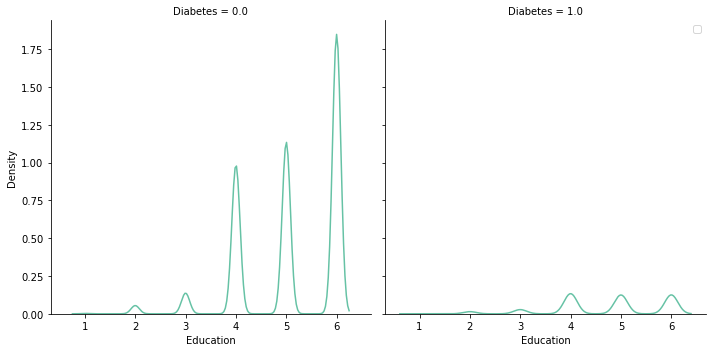

In [36]:
plt.figure(figsize=(10,6))
sns.displot(data=df1, x='Education',col='Diabetes',kind='kde' )
plt.legend()

#### Observation
The Education level of the respondent is not really determining not having diabetes.

### Bi-variate Analysis¶

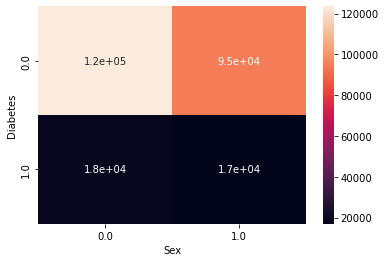

In [37]:
sns.heatmap(pd.crosstab(df1['Diabetes'], df1['Sex']), annot=True);

#### Observation
The Gender respondents with diabetes seems balance.


## Diagonistics Analysis¶


In this analysis,
we'll look at how different factors relate to whether a patient has autism or not by utilizing the Chi-Square method.

Note: Finding relationships between categorical data via correlation is one of data science's pitfalls.

Formulate our hypothesis
    
    > H0 - The feature did not have significance difference with Diabetes class.

    > H1 - The feature checked have significant difference with Diabetes class.

If the p-value is > 0.05 hence the feature did not have significance effect on Diabetes class and vice versa.

In [39]:
from sklearn.feature_selection import chi2
from scipy.stats import chisquare, chi2_contingency 

## Stastical test

# setting significance to 0.05
significance = 0.001 

def check_ChiSquareAnalysis(var1, var2, significance_level=0.05):
    tab_class = pd.crosstab(df1[var1], df1[var2], margins=True)
    tab_values = np.array([tab_class.iloc[0].values, tab_class.iloc[1].values])
    
    stat, p, dof, expected_value = chi2_contingency(tab_values)
    
    print(f"p value: {p}") 
    
    if p > significance_level: 
        print('Accept Null Hypothesis')
    else:
        print('Reject NULL HYPOTHESIS') 
   

In [40]:
#factors to analysys
check_ChiSquareAnalysis('HighBP', 'HighChol')
check_ChiSquareAnalysis('HighBP', 'Diabetes')
check_ChiSquareAnalysis('HighChol', 'Diabetes')
check_ChiSquareAnalysis('CholCheck', 'HighChol')

p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS


### Running the Chi2 analysis for all the factors together

In [47]:
X = df1.drop('Diabetes', axis=1)
y = df1['Diabetes']

#computing f score and p value 
f_score = chi2(X,y)   
p_value = pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
Stroke                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
PhysActivity            1.893271e-189
HvyAlcoholConsump       1.605281e-171
Education               1.954675e-166
Smoker                  1.570423e-115
NoDocbcCost              7.501278e-52
Fruits                   2.000073e-35
Veggies                  3.517963e-35
Sex                      2.349212e-32
CholCheck                2.935854e-10
AnyHealthcare            7.008884e-02
dtype: float64


In [48]:
p_value_features = p_value.reset_index().rename(columns={'index':'features', 0:'p_value'})
p_value_features['Decision'] = np.where(p_value_features['p_value'] < significance, 'Reject Null Hypothesis', 'Accept Null Hypothesis')

In [49]:
p_value_features

,features,p_value,Decision
0,HighBP,0.000000e+00,Reject Null Hypothesis
1,Age,0.000000e+00,Reject Null Hypothesis
2,DiffWalk,0.000000e+00,Reject Null Hypothesis
3,PhysHlth,0.000000e+00,Reject Null Hypothesis
4,MentHlth,0.000000e+00,Reject Null Hypothesis
5,GenHlth,0.000000e+00,Reject Null Hypothesis
6,Income,0.000000e+00,Reject Null Hypothesis
7,Stroke,0.000000e+00,Reject Null Hypothesis
8,BMI,0.000000e+00,Reject Null Hypothesis
9,HighChol,0.000000e+00,Reject Null Hypothesis


### Machine Learning model  
    - LogisticRegression 
    - GaussianNB
    - ExtraTreeClassifier
    - RandomForestClassifier
    - DecisionTreeClassifier
    - XGBClassifier

In [50]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

# scikit-learn module
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (177576, 21)
Shape of the y_train (177576,)
Shape of the X_test (76104, 21)
Shape of the y_test (76104,)


In [52]:
algos = [LogisticRegression(), 
         GaussianNB(),
         ExtraTreeClassifier(max_depth=5),
         RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
         DecisionTreeClassifier(max_depth=5),
         XGBClassifier(max_depth=4, n_estimators=500),]

names = ['Logistic_Regression','Guassian','ExtraTree','RandomForest','Decision_Tree', 'Xgboost']
roc_list = []

In [53]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    score= roc_auc_score(y_test,y_pred)
    roc_list.append(score)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:13] WARNING: ./src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
evaluation = pd.DataFrame({'Model': names,'Score': roc_list})
evaluation = evaluation.sort_values(by='Score', ascending=False)

In [55]:
### Accuracy Evaluation 
evaluation

,Model,Score
5,Xgboost,0.825937
3,RandomForest,0.817783
0,Logistic_Regression,0.811552
4,Decision_Tree,0.806003
1,Guassian,0.782488
2,ExtraTree,0.768542


### Conclusion :
    > Even After analysising the all the factors which we can take while perfoming the 
    analysis, We are able to get maximum accuracy from Xgboost classifier with accuracy 
    of 82.59%. Other two kernels (RandomForest,Logistic_Regression) are also performed well 
    in our case. Rest of the classifiers was not upto the mark with accuracy which they got.
    